In [18]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load data
africa_data = pd.read_csv("data/Data_Africa.csv")

In [4]:
# Inspect the dataframe
africa_data.head()

,ID,Year,Country,Continent,Population,GDP (USD)
0,1,2000,Uganda,East Africa,23303189,6.193247e+09
1,2,2001,Uganda,East Africa,24022603,5.840504e+09
2,3,2002,Uganda,East Africa,24781316,5.840504e+09
3,4,2003,Uganda,East Africa,25577246,6.606884e+09
4,5,2004,Uganda,East Africa,26403221,7.939488e+09


In [5]:
africa_data.dtypes

ID               int64
Year             int64
Country         object
Continent       object
Population       int64
GDP (USD)      float64
dtype: object

In [6]:
africa_data.shape

(1334, 6)

In [7]:
unique_countries_count = africa_data["Country"].nunique()
print("Number of unique countries:", unique_countries_count)

Number of unique countries: 58


In [10]:
# Remove the extra space in the column name
africa_data.columns = africa_data.columns.str.strip()

# Check for missing values in the "Population" and "GDP (USD)" columns
missing_values = africa_data[["Population", "GDP (USD)"]].isnull().sum()
print("Missing values in Population column:", missing_values["Population"])
print("Missing values in GDP (USD) column:", missing_values["GDP (USD)"])

Missing values in Population column: 0
Missing values in GDP (USD) column: 155


In [11]:
# Impute missing values in the "GDP (USD)" column using the mean value
mean_gdp = africa_data["GDP (USD)"].mean()
africa_data["GDP (USD)"].fillna(mean_gdp, inplace=True)

In [13]:
mean_gdp

36222735973.42667

In [15]:
# Check for missing values in the "GDP (USD)" column
missing_values_gdp = africa_data["GDP (USD)"].isnull().sum()

if missing_values_gdp == 0:
    print("There are no missing values in the GDP (USD) column.")
else:
    print(f"There are {missing_values_gdp} missing values in the GDP (USD) column.")

There are no missing values in the GDP (USD) column.


In [16]:
# Find the earliest and latest years in the "Year" column
earliest_year = africa_data["Year"].min()
latest_year = africa_data["Year"].max()

print("Time range covered by the dataset:", earliest_year, "to", latest_year)

Time range covered by the dataset: 2000 to 2022


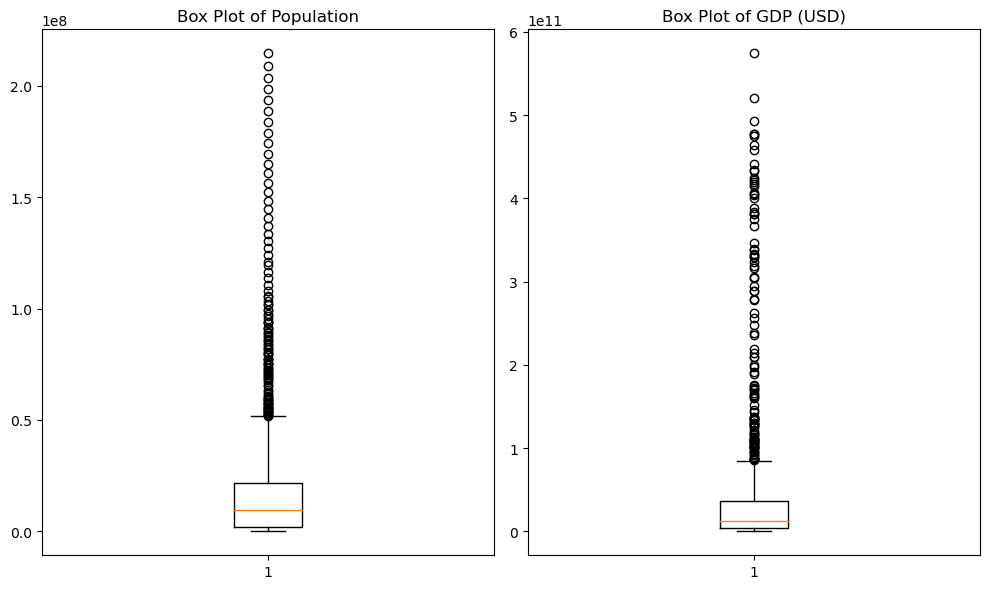

In [19]:
# Create box plots to visualize the distribution of "Population" and "GDP (USD)" columns
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.boxplot(africa_data["Population"])
plt.title("Box Plot of Population")

plt.subplot(1, 2, 2)
plt.boxplot(africa_data["GDP (USD)"])
plt.title("Box Plot of GDP (USD)")

plt.tight_layout()
plt.show()

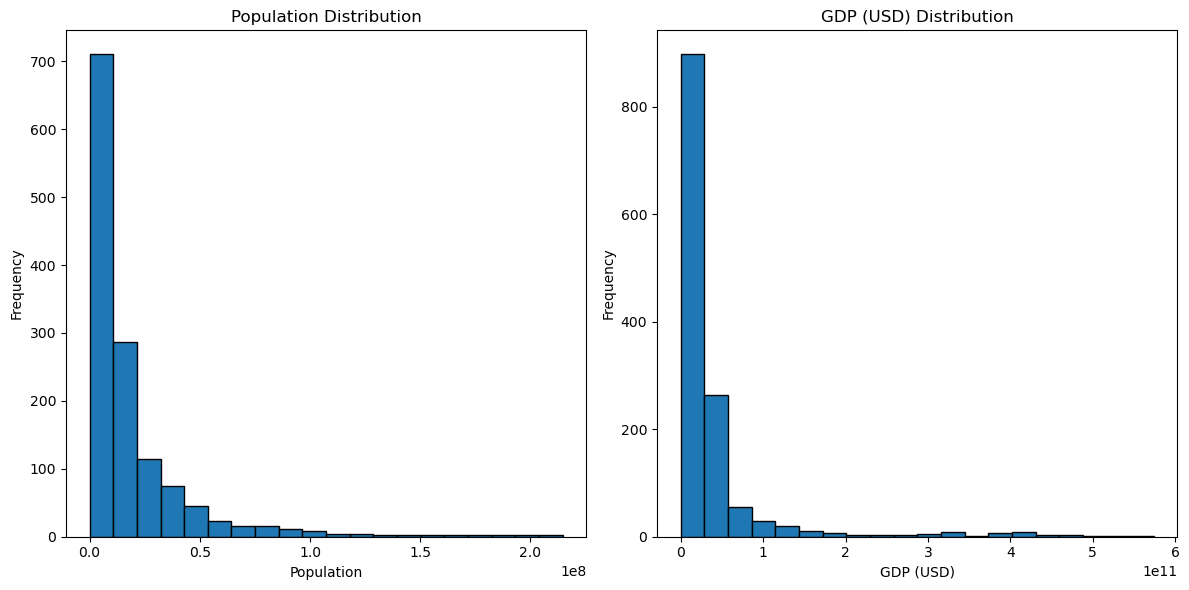

In [20]:
# Create histograms to visualize the distribution of "Population" and "GDP (USD)" columns
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(africa_data["Population"], bins=20, edgecolor='k')
plt.title("Population Distribution")
plt.xlabel("Population")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(africa_data["GDP (USD)"], bins=20, edgecolor='k')
plt.title("GDP (USD) Distribution")
plt.xlabel("GDP (USD)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()